# HR Analytics: Job Change of Data Scientists

In [ ]:
https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists

In [7]:
import zipfile
archive = 'archive.zip'
with zipfile.ZipFile(archive, 'r') as zip_file:
    zip_file.extractall('archive_unzip')
    
# еще много всего про архивы: https://pythonist.ru/raspakovka-fajlov-iz-zip-ili-tar-gz-s-pomoshhyu-python/

In [1]:
import pandas as pd

In [158]:
df = pd.read_csv('archive_unzip/aug_train.csv')

In [159]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [18]:
# Интересный аналог reindex и drop:

# Выбираем название всех столбцов
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [14]:
# Показываем все столбцы
df[['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target']]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [19]:
# Отказываемся от столбцов которые не нужны
df[['enrollee_id', 'city', 'company_type',
       'last_new_job', 'training_hours', 'target']]

,enrollee_id,city,company_type,last_new_job,training_hours,target
0,8949,city_103,NaN,1,36,1.0
1,29725,city_40,Pvt Ltd,>4,47,0.0
2,11561,city_21,NaN,never,83,0.0
3,33241,city_115,Pvt Ltd,never,52,1.0
4,666,city_162,Funded Startup,4,8,0.0
...,...,...,...,...,...,...
19153,7386,city_173,NaN,1,42,1.0
19154,31398,city_103,NaN,4,52,1.0
19155,24576,city_103,Pvt Ltd,4,44,0.0
19156,5756,city_65,Pvt Ltd,2,97,0.0


# Как быть с Warnings?

In [16]:
# Берем часть df и делаем из него новый датафрейм (хотя это всего лишь слайс)
df_city_40_female = df[(df.city == 'city_40') & (df.gender == 'Female')]

In [17]:
# Новый датафрейм можно открыть:
df_city_40_female

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
5625,18467,city_40,0.776,Female,Has relevent experience,no_enrollment,Masters,STEM,15,1000-4999,Pvt Ltd,2,25,0.0
6385,11547,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,2,10/49,Pvt Ltd,1,15,0.0
8032,24409,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,NaN,NaN,1,49,1.0
8046,27349,city_40,0.776,Female,No relevent experience,no_enrollment,Masters,STEM,1,10/49,Pvt Ltd,never,19,1.0
9923,6702,city_40,0.776,Female,No relevent experience,Full time course,Graduate,Other,1,100-500,NaN,1,34,0.0
13871,17684,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,118,0.0


In [19]:
# Но при попытки добавить строку получим Ворнинг:
df_city_40_female['new_new'] = 99

C:\Users\roman\AppData\Local\Temp\ipykernel_9444\2145585580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_40_female['new_new'] = 99


In [20]:
# Для того, чтобы этого измбежать, нужно просто добавить copy - и тогда слайс, станет настоящим отдельным df
df_city_40_female = df[(df.city == 'city_40') & (df.gender == 'Female')].copy()
df_city_40_female['new_new_new'] = 99

# Как видим Warning не возникает !

# Пропуски в данных

In [20]:
df.isna()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,False,False,False,False,False,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,False,False,False,False,False,False,False,False,False,True,True,False,False,False
19154,False,False,False,False,False,False,False,False,False,True,True,False,False,False
19155,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19156,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [21]:
# Показывает процент пропусков по каждому столбцу
df.isna().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.000000
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [25]:
# фильтруем
df.isna().mean().sort_values(ascending=False)

company_type              0.320493
company_size              0.309949
gender                    0.235306
major_discipline          0.146832
education_level           0.024011
last_new_job              0.022080
enrolled_university       0.020148
experience                0.003393
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
target                    0.000000
dtype: float64

In [26]:
# информация по столбцам, фичам или признакам:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [28]:
# если нужны только типы:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

# Типы переменных: непрерывные и категориальные

In [80]:
# Непрерывные от +inf до -inf, категориальные - номинативные...

df[['city_development_index', 'gender']]

,city_development_index,gender
0,0.920,Male
1,0.776,Male
2,0.624,NaN
3,0.789,NaN
4,0.767,Male
...,...,...
19153,0.878,Male
19154,0.920,Male
19155,0.920,Male
19156,0.802,Male


array([[<Axes: title={'center': 'city_development_index'}>]], dtype=object)

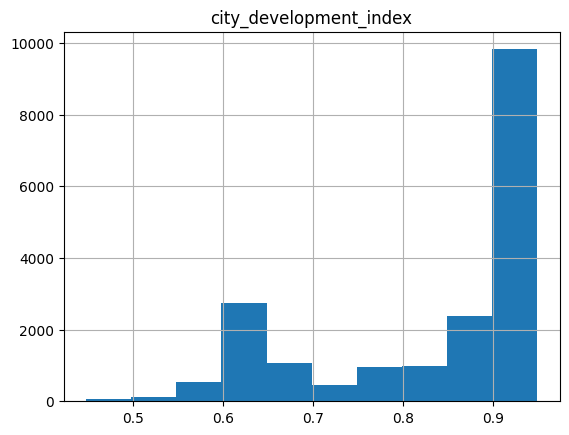

In [4]:
# Для непрерывной переменной можно построить гистограмму распределения:

df[['city_development_index']].hist()

In [82]:
# # Задаем для графики темную тему:
# # Link: https://matplotlib.org/stable/gallery/style_sheets/dark_background.html

# import numpy as np
# import matplotlib.pyplot as plt


# # plt.style.use('dark_background')

# df[['city_development_index']].hist()

# чтобы потом поменять - перезагрузка!


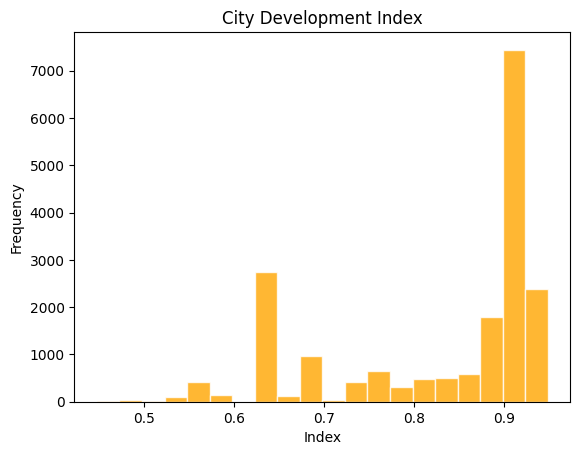

In [7]:
# Чтобы добавить подписи и вообще всё что нужно для презентации гистограммы:

# для того, чтобы нарисовать гистограмму, необходимо использовать метод hist() 
# для выбранных данных df[['city_development_index']] и передать этот метод основному 
# объекту рисунка (ax), используя метод set_title() для задания заголовка гистограммы:

import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('dark_background')

# загрузка данных
df = pd.read_csv('archive_unzip/aug_train.csv')
df = df['city_development_index']

# создание рисунка
plt.figure()

# построение гистограммы
plt.hist(df, bins=20, color='orange', alpha=0.8, edgecolor='white')

# задание заголовка гистограммы
plt.title('City Development Index')

# задание подписей осей
plt.xlabel('Index')
plt.ylabel('Frequency')

# отображение гистограммы
plt.show()

In [22]:
# Функция describe выводится только для непрервыных данных:

df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [10]:
df[['city_development_index', 'gender']]

,city_development_index,gender
0,0.920,Male
1,0.776,Male
2,0.624,NaN
3,0.789,NaN
4,0.767,Male
...,...,...
19153,0.878,Male
19154,0.920,Male
19155,0.920,Male
19156,0.802,Male


In [ ]:
# Для категориальных данных мы используем функции для описания, как устроена выборка:

In [11]:
df[['gender']].describe()

,gender
count,14650
unique,3
top,Male
freq,13221


In [12]:
df[['gender']].value_counts()

gender
Male      13221
Female     1238
Other       191
dtype: int64

# Фильтрация выбросов !

In [14]:
# Определяем 25 квантиль
df['city_development_index'].quantile(0.25)

0.74

In [15]:
q = df['city_development_index'].quantile(0.25)

In [16]:
# Для удобства задаем переменную

q

0.74

In [18]:
# Таким образом получаем 25% нашего датасета:

df[df['city_development_index'] < q]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
10,29452,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,32,1.0
13,5826,city_21,0.624,Male,No relevent experience,NaN,NaN,NaN,2,NaN,NaN,never,24,0.0
14,8722,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,never,26,0.0
17,5764,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,2,5000-9999,Pvt Ltd,2,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19144,17191,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,never,48,1.0
19145,155,city_44,0.725,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,190,0.0
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19148,9212,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,3,40,1.0


In [19]:
# Для того, чтобы убрать 5% самых малых или самых больших значений - задаем:

q = df['city_development_index'].quantile(0.05)

In [27]:
# Создадим новый df2 с копированием:
df2 = df[df['city_development_index'] >= q].copy()

array([[<Axes: title={'center': 'city_development_index'}>]], dtype=object)

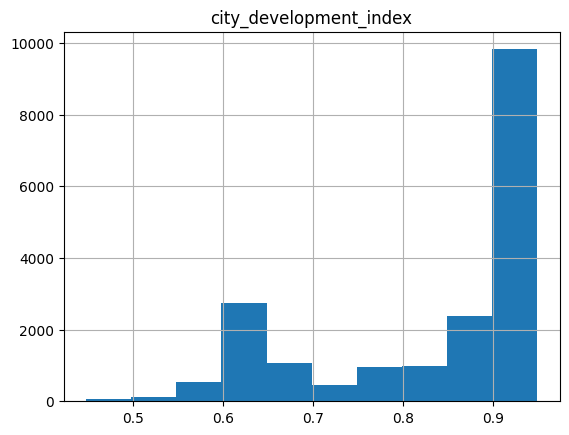

In [23]:
# Сравним гистограммы распределения:
# Для исходного столбца:
df[['city_development_index']].hist()


array([[<Axes: title={'center': 'city_development_index'}>]], dtype=object)

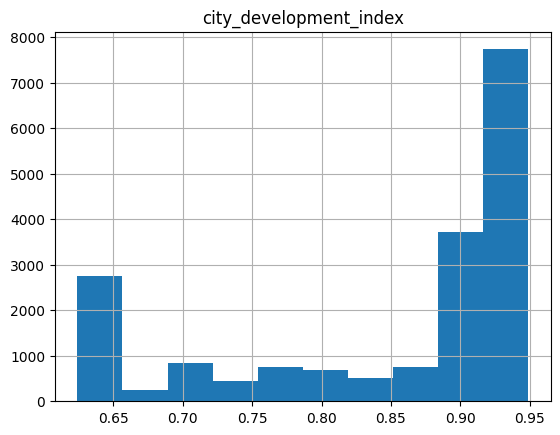

In [28]:
# Для измененного столбца:
df2[['city_development_index']].hist()

In [38]:
# Подрубим 5% минимальных и 5% максимальных значений:

q1 = df['city_development_index'].quantile(0.05)
q2 = df['city_development_index'].quantile(0.95)

In [39]:
df3 = df[df['city_development_index'].between(q1, q2)].copy()

array([[<Axes: title={'center': 'city_development_index'}>]], dtype=object)

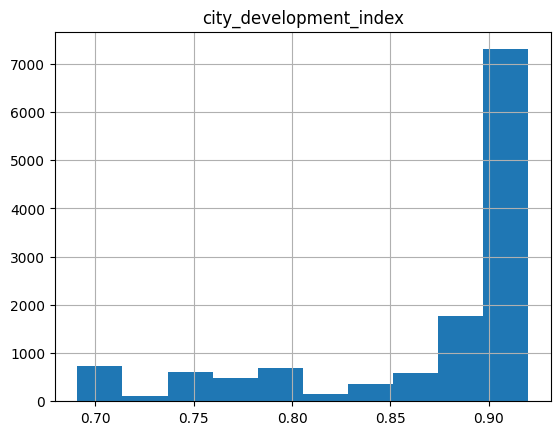

In [40]:
df3[['city_development_index']].hist()

array([[<Axes: title={'center': 'city_development_index'}>]], dtype=object)

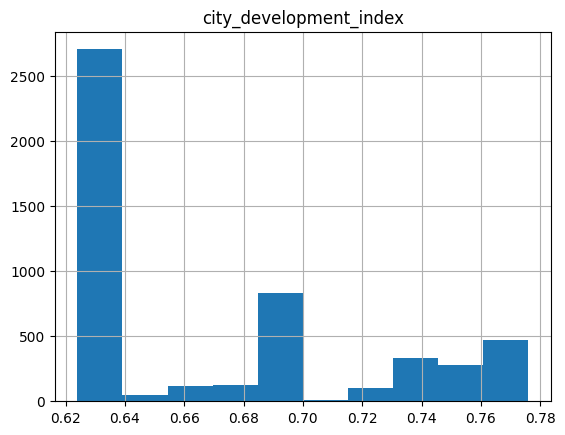

In [42]:
# В 0.9 - сосредоточено больше половины всех значений, для того чтобы убрать все эти значения надо урезать сверху до 0.7 данных
q1 = df['city_development_index'].quantile(0.05)
q2 = df['city_development_index'].quantile(0.3)

df4 = df[df['city_development_index'].between(q1, q2)].copy()

df4[['city_development_index']].hist()

# Сводники

In [16]:
# рассчитываем процент (долю) тех, кто хочет сменить работу:

# это уже сводник, но сводник без группировки - по всему датасету:
df['target'].mean()

# показано, что 25% всех во всем датасете хочет сменить работу

0.24934753105752167

In [50]:
# делаем группировку по полу для параметра target и получаем срденее значение:
df.groupby('gender')['target'].mean()

gender
Female    0.263328
Male      0.227819
Other     0.261780
Name: target, dtype: float64

In [52]:
# делаем группировку по полу для параметра target и получаем срденее значение + добавляем количество и среднее (.agg):

# это дает ответ на вопрос: кто соответсвтуют target, то есть хотят поменять работу ! и сколько count всего человек по gender

df.groupby('gender')['target'].agg(['count', 'mean'])

,count,mean
gender,,
Female,1238,0.263328
Male,13221,0.227819
Other,191,0.261780


In [54]:
# Но здесь необходимо учитывать потерю данных - nan

# Если мы зададим переменную по этому своднику:

t = df.groupby('gender')['target'].agg(['count', 'mean'])

# и посчитаем количество участников здесь всего:

t['count'].sum()

14650

In [57]:
# То это количество не будет совпадать с начальным количеством человек всего в df:

len(df)

19158

In [17]:
# Для того, чтобы избегать потерю данных - nan - необходимо учитывать пропуски:

df.groupby('gender', dropna = False)['target'].agg(['count', 'mean'])

,count,mean
gender,,
Female,1238,0.263328
Male,13221,0.227819
Other,191,0.261780
NaN,4508,0.308119


In [ ]:
# здесь мы получаем дополнительную строку, отражающую колиество nan, потерянное в прошлом 

In [18]:
# теперь: 
df.groupby('gender', dropna = False)['target'].agg(['count']).sum() == len(df)

count    True
dtype: bool

In [19]:
### Другой пример. Копируем ту же функцию, но с другой группировкой:

df.groupby('education_level', dropna = False)['target'].agg(['count', 'mean'])

,count,mean
education_level,,
Graduate,11598,0.279790
High School,2017,0.195340
Masters,4361,0.214400
Phd,414,0.140097
Primary School,308,0.133117
NaN,460,0.226087


<Axes: xlabel='education_level'>

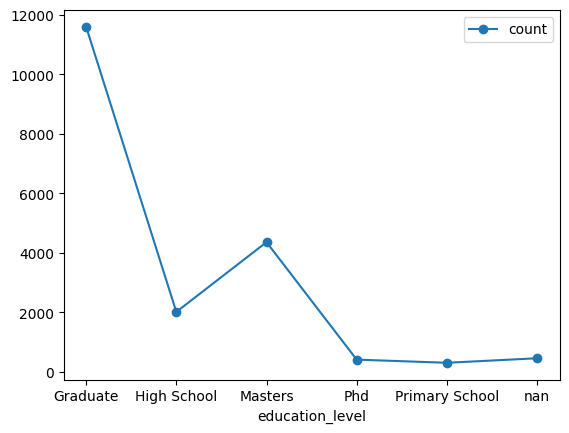

In [23]:
# Нарисуем график для значений:

df.groupby('education_level', dropna = False)['target'].agg(['count']).plot(marker = 'o')

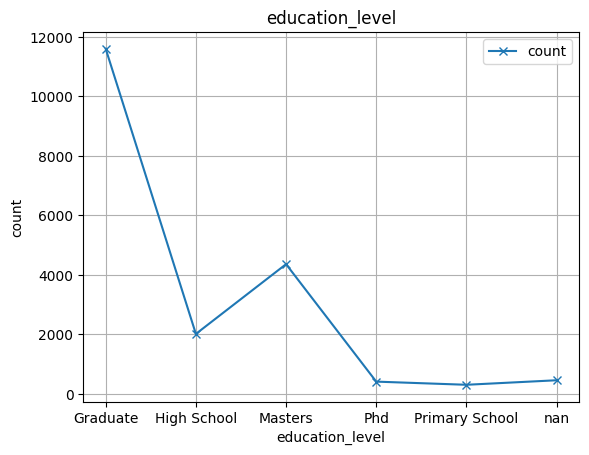

In [22]:
# Чтобы подписать ось y на графике и добавить крестики :

# Пример кода:
df.groupby('education_level', dropna = False)['target'].agg(['count']).plot(marker = 'x')

plt.ylabel('count')
plt.title('education_level')
plt.grid()


Text(0.5, 1.0, 'education_level')

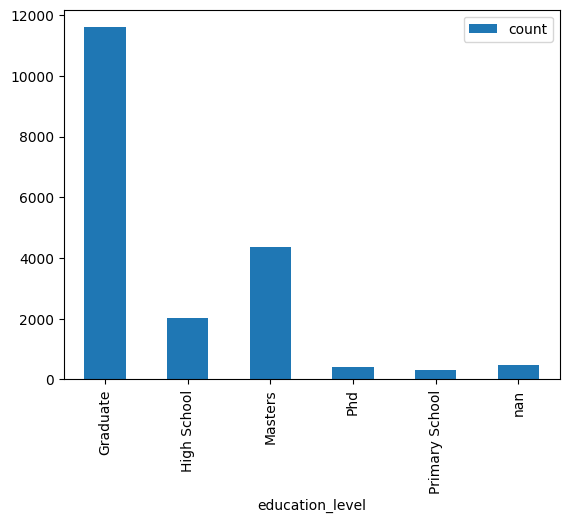

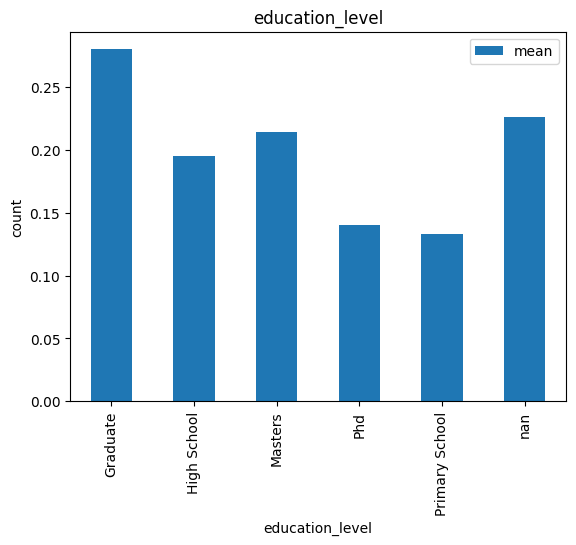

In [89]:
# Чтобы изменить тип графика на bar

# Пример кода:
df.groupby('education_level', dropna = False)['target'].agg(['count']).plot(kind = 'bar')
df.groupby('education_level', dropna = False)['target'].agg(['mean']).plot(kind = 'bar')

plt.ylabel('count')
plt.title('education_level')

<Axes: xlabel='education_level'>

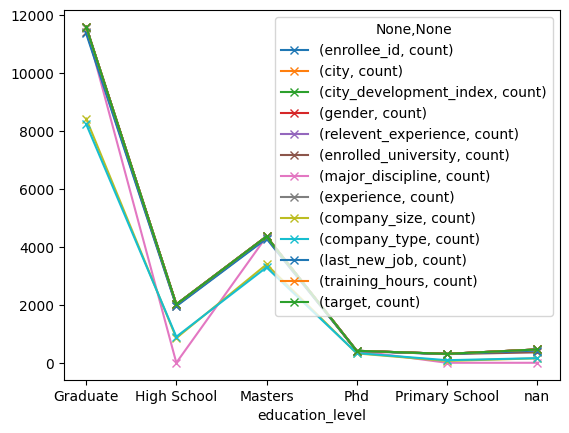

In [24]:
df.groupby('education_level', dropna = False).agg(['count']).plot(marker = 'x')

# СВОДНИКИ ДЛЯ НЕПРЕРЫВНЫХ ПЕРЕМЕННЫХ

In [23]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [25]:
### Другой пример. Копируем ту же функцию, но с другой группировкой:

df.groupby('city_development_index', dropna = False)['target'].agg(['count', 'mean'])

# информация представляется не читаемой (много строк, без общей статистики):

,count,mean
city_development_index,,
0.448,17,0.647059
0.479,28,0.535714
0.487,5,0.800000
0.493,13,0.538462
0.512,5,0.600000
...,...,...
0.924,301,0.093023
0.925,171,0.140351
0.926,1336,0.099551


In [93]:
# Для того, чтобы анализировать непрерывную переменную - ее надо побить на интервалы:

pd.cut(df['city_development_index'], 5) 

# это пример того, как работает гистограмма - непрервыную переменную бъет на 5 интервалов - равных по длине

0        (0.849, 0.949]
1        (0.749, 0.849]
2        (0.548, 0.648]
3        (0.749, 0.849]
4        (0.749, 0.849]
              ...      
19153    (0.849, 0.949]
19154    (0.849, 0.949]
19155    (0.849, 0.949]
19156    (0.749, 0.849]
19157    (0.849, 0.949]
Name: city_development_index, Length: 19158, dtype: category
Categories (5, interval[float64, right]): [(0.447, 0.548] < (0.548, 0.648] < (0.648, 0.749] < (0.749, 0.849] < (0.849, 0.949]]

In [27]:
# такое разбиение на интервалы можно передать в переменную:

df['city_development_index_group'] = pd.cut(df['city_development_index'], 5) 

In [28]:
# сейчас уже можно сгруппировать по этой переменной и смотреть статистику по этим группам:

df.groupby('city_development_index_group', dropna = False)['target'].agg(['mean', 'count'])

,mean,count
city_development_index_group,,
"(0.447, 0.548]",0.578652,178
"(0.548, 0.648]",0.582651,3297
"(0.648, 0.749]",0.273381,1529
"(0.749, 0.849]",0.194459,1949
"(0.849, 0.949]",0.160262,12205


<Axes: xlabel='city_development_index_group'>

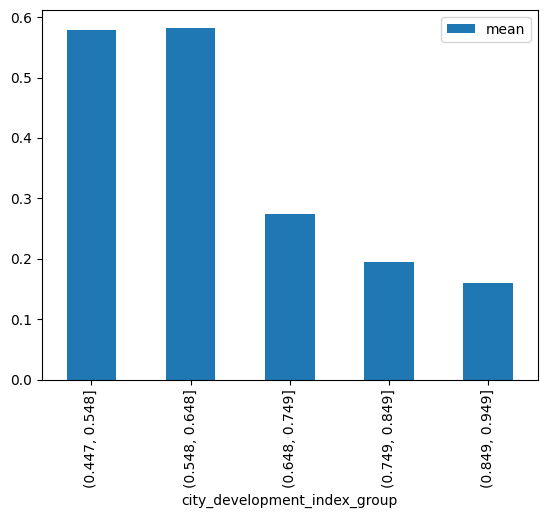

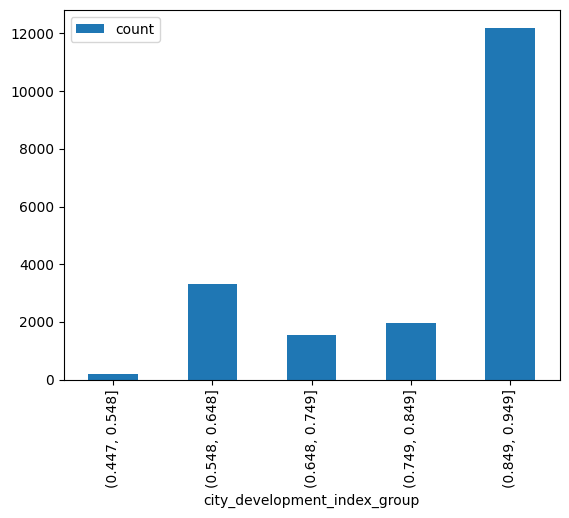

In [29]:
# и строить графики:

df.groupby('city_development_index_group', dropna = False)['target'].agg(['mean']).plot(kind = 'bar')
# дает процент людей для этой группы, которые соответствуют таргету - хотят поменять работу

df.groupby('city_development_index_group', dropna = False)['target'].agg(['count']).plot(kind = 'bar')
# дает количество людей живущих в этих группах

# Есть еще одна функция qcut - которая разбивает данные по количеству людей: qcat

In [102]:
# Есть еще одна функция qcut - которая разбивает данные по количеству людей: qcat


# df['city_development_index_group_q'] = pd.qcut(df['city_development_index'], 5)
# Поскольку очень много повторяющихся значений - возникает ошибка.

In [29]:
# поэтому нужно удалять дубликаты: 

df['city_development_index_group_q'] = pd.qcut(df['city_development_index'], 5, duplicates = 'drop')

In [30]:
df['city_development_index_group_q']

0         (0.878, 0.92]
1        (0.691, 0.878]
2        (0.447, 0.691]
3        (0.691, 0.878]
4        (0.691, 0.878]
              ...      
19153    (0.691, 0.878]
19154     (0.878, 0.92]
19155     (0.878, 0.92]
19156    (0.691, 0.878]
19157    (0.691, 0.878]
Name: city_development_index_group_q, Length: 19158, dtype: category
Categories (4, interval[float64, right]): [(0.447, 0.691] < (0.691, 0.878] < (0.878, 0.92] < (0.92, 0.949]]

In [31]:
df.groupby('city_development_index_group_q', dropna = False)['target'].agg(['count', 'mean'])

,count,mean
city_development_index_group_q,,
"(0.447, 0.691]",3869,0.550530
"(0.691, 0.878]",3827,0.206428
"(0.878, 0.92]",8925,0.178375
"(0.92, 0.949]",2537,0.104454


<Axes: xlabel='city_development_index_group_q'>

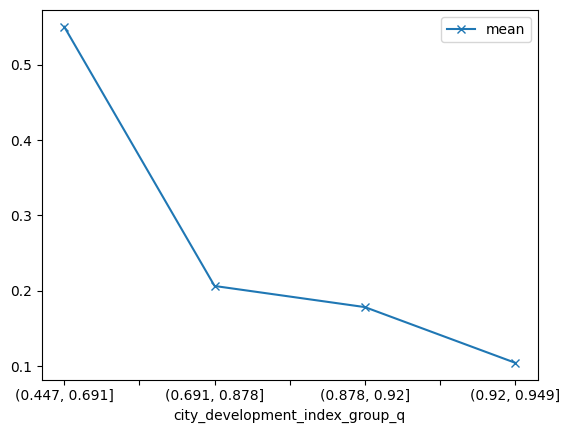

In [32]:
df.groupby('city_development_index_group_q', dropna = False)['target'].agg(['mean']).plot(marker = 'x')

<Axes: xlabel='city_development_index_group_q'>

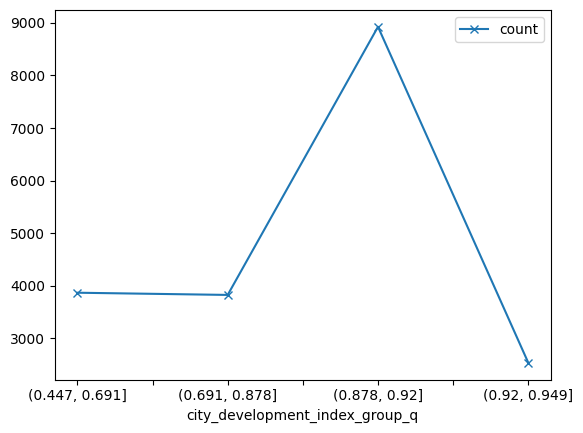

In [112]:
df.groupby('city_development_index_group_q', dropna = False)['target'].agg(['count']).plot(marker = 'x')

In [113]:
# проверяем контрольную сумму:

t = df.groupby('city_development_index_group_q', dropna = False)['target'].agg(['count', 'mean'])
t.sum()

count    19158.000000
mean         1.039787
dtype: float64

In [114]:
len(df)

19158

In [ ]:
# контрольная сумма людей совпадает, несмотря на то, что удалялись дубликаты !? до сих пор не понял как это работает

In [122]:
# можно самому задавать интервалы, так, чтобы удобнее было смотреть:

# df['city_development_index_group'] = pd.cut(df['city_development_index'], 5) 
custom_intervals = pd.cut(df['city_development_index'], [0.1, 0.2, 0.5, float('inf')])

# это искусственный пример разбиения на отрезки от (0.1, 0.2], (0.2, 0.5], (0.5, inf], 
#но показывает как можно задавать свои интервалы

# необходимо учитыывать, что первое значение не включается  и лучше брать от -float('inf')

In [121]:
df.groupby(custom_intervals, dropna = False)['target'].agg(['count', 'mean'])

,count,mean
city_development_index,,
"(0.1, 0.2]",0,NaN
"(0.2, 0.5]",63,0.587302
"(0.5, inf]",19095,0.248233


# Объединение субгрупп в одну группу

In [126]:
# например мы бы хотели объединить High School и Primary School в группу школьников
# и еще Masters и Phd

In [33]:
df.groupby('education_level', dropna = False)['target'].agg(['count', 'mean'])

,count,mean
education_level,,
Graduate,11598,0.279790
High School,2017,0.195340
Masters,4361,0.214400
Phd,414,0.140097
Primary School,308,0.133117
NaN,460,0.226087


In [34]:
def education_group(x):
    if x in ['High School', 'Primary School']:
        return 'School'
    elif x in ['Masters', 'Phd']:
        return 'Masters & Phd'
    else:
        return x

In [35]:
df['education_level'].apply(education_group)

0             Graduate
1             Graduate
2             Graduate
3             Graduate
4        Masters & Phd
             ...      
19153         Graduate
19154         Graduate
19155         Graduate
19156           School
19157           School
Name: education_level, Length: 19158, dtype: object

In [36]:
# создаем новый столбец df['new_education_level'] в нашем df
df['new_education_level'] = df['education_level'].apply(education_group)

In [37]:
df.groupby(df['new_education_level'], dropna = False)['target'].agg(['count', 'mean'])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
NaN,460,0.226087


In [38]:
# ту же самую операцию можно делать с помощью replace (или нескольких таких replace):

df['education_level'].replace('Primary School', 'School')

0           Graduate
1           Graduate
2           Graduate
3           Graduate
4            Masters
            ...     
19153       Graduate
19154       Graduate
19155       Graduate
19156    High School
19157         School
Name: education_level, Length: 19158, dtype: object

In [39]:
# таким образом можно написать последовательно несколько replace и получить результат, как с def education_group(x):

df['education_level'].replace('Primary School', 'School').replace('Graduate', 'Hello_yeah')

0         Hello_yeah
1         Hello_yeah
2         Hello_yeah
3         Hello_yeah
4            Masters
            ...     
19153     Hello_yeah
19154     Hello_yeah
19155     Hello_yeah
19156    High School
19157         School
Name: education_level, Length: 19158, dtype: object

In [40]:
# Еще одна возможность поменять название групп - использование словаря {}

# создаем словарь
d = {'Primary School':'Just School', 'Graduate': 'You see this'}

# замэпим словарь
df['education_level'].map(d)

# чтобы некоторые значения не стали nan здесь надо делать полный словарь всех названий

0        You see this
1        You see this
2        You see this
3        You see this
4                 NaN
             ...     
19153    You see this
19154    You see this
19155    You see this
19156             NaN
19157     Just School
Name: education_level, Length: 19158, dtype: object

# Более сложная логика, когда функция, которую мы создаем - использует несколько столбцов. Функция с несколькими столбцами

In [ ]:
# условие заполнения нового столбца, которое требует участие других столбцов - и применяется эта функция 
# уже не к одному столбцу, а ко всему датафрейму

In [ ]:
# задача. пример:

# в нашем датафрейме df категория phd неправильно указали параметр trainung_hours и им надо накинуть по +1000

In [41]:
# задаем функцию

def new_training_hours(row):
    if row['education_level'] == 'Phd':
        return row['training_hours'] + 1000
    else:
        return row['training_hours']

In [42]:
# добавляем новый столбец в df

df['new_training_hours'] = df.apply(new_training_hours, axis = 1)

In [43]:
df[df['education_level'] == 'Phd']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_development_index_group,city_development_index_group_q,new_education_level,new_training_hours
37,10164,city_114,0.926,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,Pvt Ltd,4,42,1.0,"(0.849, 0.949]","(0.92, 0.949]",Masters & Phd,1042
121,13915,city_16,0.910,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,Pvt Ltd,2,20,1.0,"(0.849, 0.949]","(0.878, 0.92]",Masters & Phd,1020
130,3921,city_36,0.893,no_info,No relevent experience,no_enrollment,Phd,STEM,>20,1000-4999,Public Sector,>4,4,0.0,"(0.849, 0.949]","(0.878, 0.92]",Masters & Phd,1004
135,23947,city_103,0.920,no_info,No relevent experience,no_enrollment,Phd,STEM,NaN,NaN,NaN,NaN,70,0.0,"(0.849, 0.949]","(0.878, 0.92]",Masters & Phd,1070
152,31786,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,>4,14,0.0,"(0.849, 0.949]","(0.878, 0.92]",Masters & Phd,1014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18738,1477,city_162,0.767,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,10000+,Pvt Ltd,1,34,0.0,"(0.749, 0.849]","(0.691, 0.878]",Masters & Phd,1034
18800,18365,city_103,0.920,Male,Has relevent experience,no_enrollment,Phd,STEM,15,50-99,Funded Startup,4,108,0.0,"(0.849, 0.949]","(0.878, 0.92]",Masters & Phd,1108
18807,229,city_114,0.926,Male,No relevent experience,no_enrollment,Phd,STEM,14,5000-9999,Public Sector,>4,9,1.0,"(0.849, 0.949]","(0.92, 0.949]",Masters & Phd,1009
18944,2678,city_104,0.924,no_info,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,NaN,27,0.0,"(0.849, 0.949]","(0.92, 0.949]",Masters & Phd,1027


In [77]:
# можно делать то же с loc, но это не рекомендуется:

# df['new_training_hours'] = df['training_hours']
# df.loc[df['education_level'] == 'Phd', 'new_training_hours'] += 1000

# Функция Pivot Table (она используется реже чем обычный groupby)

In [44]:
# делаем группировку по столбцу df['new_education_level'] с ориентацией на таргет

df.pivot_table(index = df['new_education_level'], values = 'target', aggfunc = ['count', 'mean'])

,count,mean
,target,target
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097


In [45]:
# В отличае от функции groupby здесь нет nan


df.groupby(df['new_education_level'], dropna = False)['target'].agg(['count', 'mean'])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
NaN,460,0.226087


In [46]:
# Если мы зададим для df.pivot_table... параметр dropna=False - из расчета просто удаляться столбцы в которых все  с nan: (???)

df.pivot_table(index = df['new_education_level'], values = 'target', aggfunc = ['count', 'mean'], dropna = False)

# сами значнеия остануться

,count,mean
,target,target
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097


In [47]:
# для того, чтобы отобразить строки с nan - надо вручную заполнить строки с nan:

df['new_education_level'] = df['new_education_level'].fillna('no_info')

In [48]:
df.pivot_table(index = df['new_education_level'], values = 'target', aggfunc = ['count', 'mean'])

,count,mean
,target,target
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
no_info,460,0.226087


In [50]:
# здесь для pivot_table возникает проблема мульти индексации столбцов. переименовать их и сделать одним
# поможет код по запрос flatten_multiindex: 

# https://stackoverflow.com/questions/14507794/how-to-flatten-a-hierarchical-index-in-columns

# df.columns = [' '.join(col).strip() for col in df.columns.values]

In [52]:
# для лечения мульти индкса:

t = df.pivot_table(index = df['new_education_level'], values = 'target', aggfunc = ['count', 'mean'])
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [125]:
t

,count_target,mean_target
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
no_info,460,0.226087


In [54]:
# также полезно избавляться от индекса в строках:

t.reset_index()

,new_education_level,count_target,mean_target
0,Graduate,11598,0.279790
1,Masters & Phd,4775,0.207958
2,School,2325,0.187097
3,no_info,460,0.226087


In [55]:
# у pivot_table есть очень крутая фича:

# добавлять столбцы для группироуки в сводную таблицу и оценивать уже комбинацию признаков

# например: здесь идет оценка уровня образования для таргет = 1 или 0
df.pivot_table(index = df['new_education_level'], values = 'target', aggfunc = ['count', 'mean'])

,count,mean
,target,target
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
no_info,460,0.226087


In [56]:
# здесь добавим признак по которому хотим дополнительно группировать 'gender':

df.pivot_table(index = df['new_education_level'], columns = 'gender', values = 'target', aggfunc = ['count', 'mean'])

count                          mean                      \
gender              Female  Male Other no_info    Female      Male     Other   
new_education_level                                                            
Graduate               773  8144   112    2569  0.279431  0.257122  0.330357   
Masters & Phd          386  3237    31    1121  0.233161  0.186284  0.096774   
School                  71  1598    39     617  0.267606  0.171464  0.205128   
no_info                  8   242     9     201  0.125000  0.169421  0.222222   

                               
gender                no_info  
new_education_level            
Graduate             0.349552  
Masters & Phd        0.264942  
School               0.217180  
no_info              0.298507

In [57]:
# groupby может запускать новые признаки в строки, а в стоблцы не может:
# вот исходный вариант:
df.groupby(df['new_education_level']) ['target'].agg(['count', 'mean'])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
no_info,460,0.226087


In [58]:
# вот группировка с доп.параметрами:
df.groupby(['new_education_level','gender'], dropna = False) ['target'].agg(['count', 'mean'])

count      mean
new_education_level gender                  
Graduate            Female     773  0.279431
                    Male      8144  0.257122
                    Other      112  0.330357
                    no_info   2569  0.349552
Masters & Phd       Female     386  0.233161
                    Male      3237  0.186284
                    Other       31  0.096774
                    no_info   1121  0.264942
School              Female      71  0.267606
                    Male      1598  0.171464
                    Other       39  0.205128
                    no_info    617  0.217180
no_info             Female       8  0.125000
                    Male       242  0.169421
                    Other        9  0.222222
                    no_info    201  0.298507

In [139]:
# убрать мульти индекс пригодится также при работе с groupby (смотри выше)

# это пригодится, когда целевой параметр не только ['target']:

df.groupby(['new_education_level'], dropna = False) [['target', 'city_development_index']].agg(['count', 'mean'])


target           city_development_index          
                     count      mean                  count      mean
new_education_level                                                  
Graduate             11598  0.279790                  11598  0.823731
Masters & Phd         4775  0.207958                   4775  0.840032
School                2325  0.187097                   2325  0.836080
no_info                460  0.226087                    460  0.805207

In [ ]:
# в данном случае появляется мультииндекс, который можно полечить с помощью:

# https://stackoverflow.com/questions/14507794/how-to-flatten-a-hierarchical-index-in-columns

# df.columns = [' '.join(col).strip() for col in df.columns.values]


In [140]:
# для примера здесь:
t = df.groupby(['new_education_level'], dropna = False) [['target', 'city_development_index']].agg(['count', 'mean'])

In [141]:
t.columns = [' '.join(col).strip() for col in t.columns.values]

In [144]:
t.reset_index()

,new_education_level,target count,target mean,city_development_index count,city_development_index mean
0,Graduate,11598,0.279790,11598,0.823731
1,Masters & Phd,4775,0.207958,4775,0.840032
2,School,2325,0.187097,2325,0.836080
3,no_info,460,0.226087,460,0.805207


In [ ]:
#### Чаще всего pivot_table используется тогда, когда надо сделать HEATMAP

# Heatmap

In [59]:
df.pivot_table(index = df['new_education_level'], columns = 'gender', values = 'target', aggfunc = ['mean'])

mean                              
gender                 Female      Male     Other   no_info
new_education_level                                        
Graduate             0.279431  0.257122  0.330357  0.349552
Masters & Phd        0.233161  0.186284  0.096774  0.264942
School               0.267606  0.171464  0.205128  0.217180
no_info              0.125000  0.169421  0.222222  0.298507

In [60]:
# заполним пропуски в значениях по столбцу гендер
df['gender'] = df['gender'].fillna('no_info')

In [61]:
df.pivot_table(index = df['new_education_level'], columns = 'gender', values = 'target', aggfunc = ['mean'])

mean                              
gender                 Female      Male     Other   no_info
new_education_level                                        
Graduate             0.279431  0.257122  0.330357  0.349552
Masters & Phd        0.233161  0.186284  0.096774  0.264942
School               0.267606  0.171464  0.205128  0.217180
no_info              0.125000  0.169421  0.222222  0.298507

In [62]:
# создадим из этого отдельно табличку t под heatmap:

t = df.pivot_table(index = df['new_education_level'], columns = 'gender', values = 'target', aggfunc = ['mean'])

In [63]:
import seaborn as sns

<Axes: xlabel='None-gender', ylabel='new_education_level'>

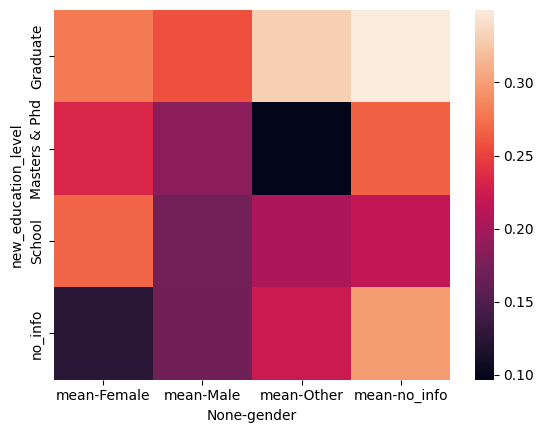

In [64]:
sns.heatmap(t)

In [ ]:
# Чтобы задать метку для оси x (горизонтальной оси) в тепловой карте, необходимо добавить параметр xlabel 
# после вызова функции sns.heatmap(). Для того чтобы правильно задать метку 'gender', необходимо сделать следующее:
    
# В этом примере мы используем функцию plt.xlabel() из библиотеки Matplotlib для установки метки для оси x. 
# Обратите внимание, что мы также добавляем метку для оси y с помощью plt.ylabel(). 
# Не забудьте вызвать plt.show() в конце, чтобы отобразить график.
    
import seaborn as sns
import matplotlib.pyplot as plt

t = ... # ваш набор данных

sns.heatmap(t)
plt.xlabel('gender') # добавляем метку для оси x
plt.ylabel('new_education_level') # добавляем метку для оси y
plt.show() # отображаем график


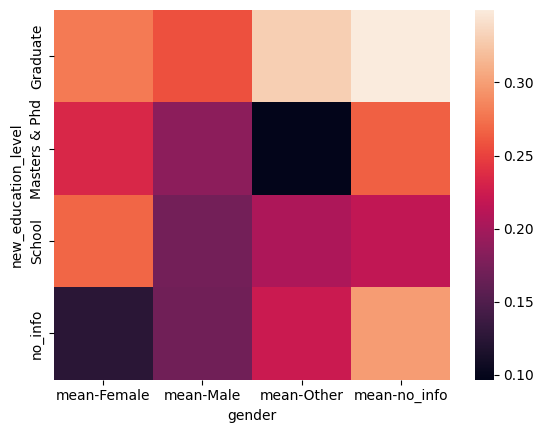

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(t)
plt.xlabel('gender') # добавляем метку для оси x
plt.ylabel('new_education_level') # добавляем метку для оси y
plt.show() # отображаем график

# And now: CORRELATION & Phi K

In [6]:
# correlation

# не используй корреляцию для разведывательного анализа, только для оценки линейных связей

In [66]:
df.corr()

C:\Users\roman\AppData\Local\Temp\ipykernel_24680\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,enrollee_id,city_development_index,training_hours,target,new_training_hours
enrollee_id,1.000000,-0.040455,0.000998,0.049475,-0.027681
city_development_index,-0.040455,1.000000,0.001920,-0.341665,0.060995
training_hours,0.000998,0.001920,1.000000,-0.021577,0.385957
target,0.049475,-0.341665,-0.021577,1.000000,-0.042844
new_training_hours,-0.027681,0.060995,0.385957,-0.042844,1.000000


C:\Users\roman\AppData\Local\Temp\ipykernel_24680\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

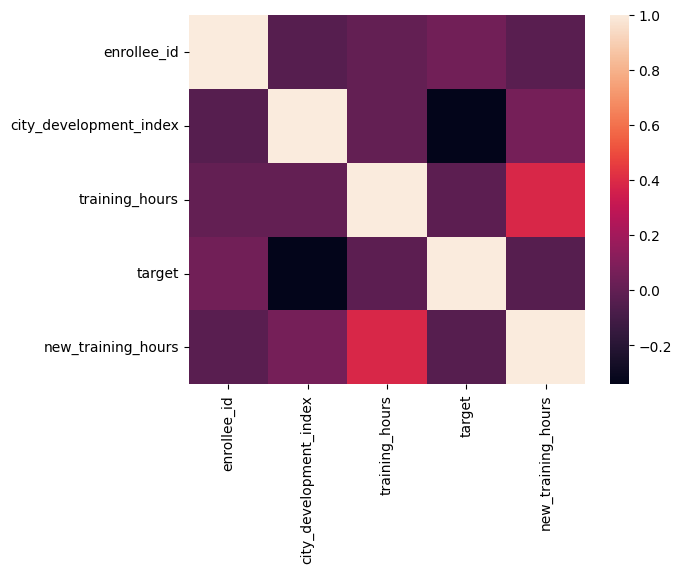

In [67]:
sns.heatmap(df.corr())

In [69]:
# Чтобы избежать Warning выбираем numeric столбцы:

df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target',
       'city_development_index_group', 'city_development_index_group_q',
       'new_education_level', 'new_training_hours'],
      dtype='object')

In [71]:
df[['city_development_index', 'training_hours', 'target']].corr()

,city_development_index,training_hours,target
city_development_index,1.000000,0.001920,-0.341665
training_hours,0.001920,1.000000,-0.021577
target,-0.341665,-0.021577,1.000000


In [72]:
t = df[['city_development_index', 'training_hours', 'target']].corr()

<Axes: >

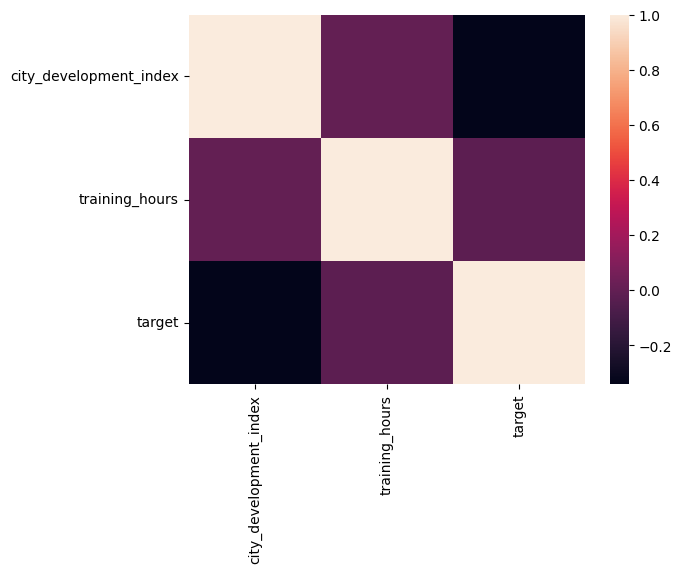

In [73]:
sns.heatmap(t)

In [ ]:
# для разведывательного анализа будем использовать phi k

https://www.linkedin.com/feed/update/urn:li:activity:7058757121131053057/

In [78]:
!pip install phik


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
# As always, the first step is to load the libraries.

import pandas as pd
import matplotlib.pyplot as plt

import phik
from phik.report import plot_correlation_matrix
from phik import report

In [80]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['enrollee_id', 'city_development_index', 'training_hours', 'target', 'new_training_hours']


In [81]:
phik_overview.round(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_development_index_group,city_development_index_group_q,new_education_level,new_training_hours
enrollee_id,1.00,0.21,0.13,0.13,0.07,0.05,0.08,0.03,0.09,0.03,0.02,0.05,0.02,0.07,0.12,0.10,0.05,0.03
city,0.21,1.00,1.00,0.24,0.15,0.38,0.36,0.18,0.35,0.25,0.22,0.24,0.08,0.48,1.00,1.00,0.38,0.12
city_development_index,0.13,1.00,1.00,0.16,0.10,0.25,0.22,0.13,0.31,0.13,0.11,0.17,0.00,0.48,1.00,0.89,0.17,0.06
gender,0.13,0.24,0.16,1.00,0.18,0.08,0.05,0.09,0.20,0.04,0.07,0.09,0.01,0.12,0.11,0.23,0.15,0.02
relevent_experience,0.07,0.15,0.10,0.18,1.00,0.24,0.26,0.10,0.50,0.07,0.28,0.54,0.02,0.20,0.06,0.09,0.47,0.04
enrolled_university,0.05,0.38,0.25,0.08,0.24,1.00,0.22,0.15,0.43,0.07,0.23,0.43,0.00,0.09,0.17,0.15,0.15,0.10
education_level,0.08,0.36,0.22,0.05,0.26,0.22,1.00,0.10,0.30,0.08,0.12,0.25,0.03,0.08,0.13,0.12,1.00,0.64
major_discipline,0.03,0.18,0.13,0.09,0.10,0.15,0.10,1.00,0.12,0.04,0.09,0.05,0.00,0.03,0.10,0.13,0.08,0.02
experience,0.09,0.35,0.31,0.20,0.50,0.43,0.30,0.12,1.00,0.13,0.11,0.47,0.00,0.24,0.34,0.36,0.31,0.15
company_size,0.03,0.25,0.13,0.04,0.07,0.07,0.08,0.04,0.13,1.00,0.33,0.10,0.00,0.07,0.10,0.15,0.13,0.04


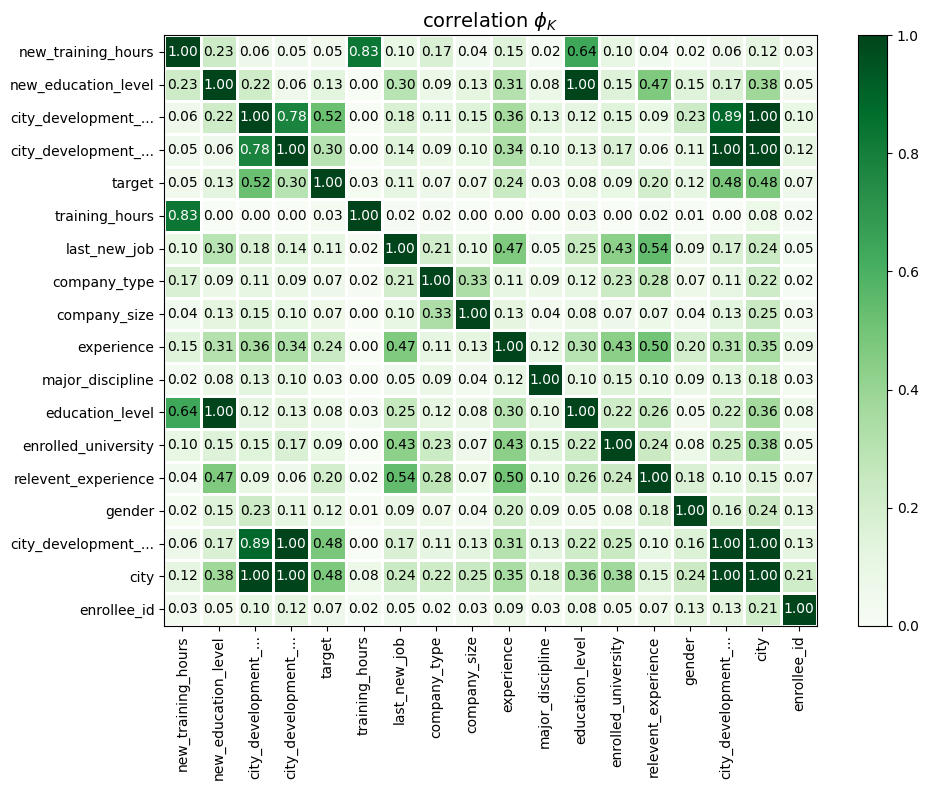

In [84]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(10, 8))
plt.tight_layout()

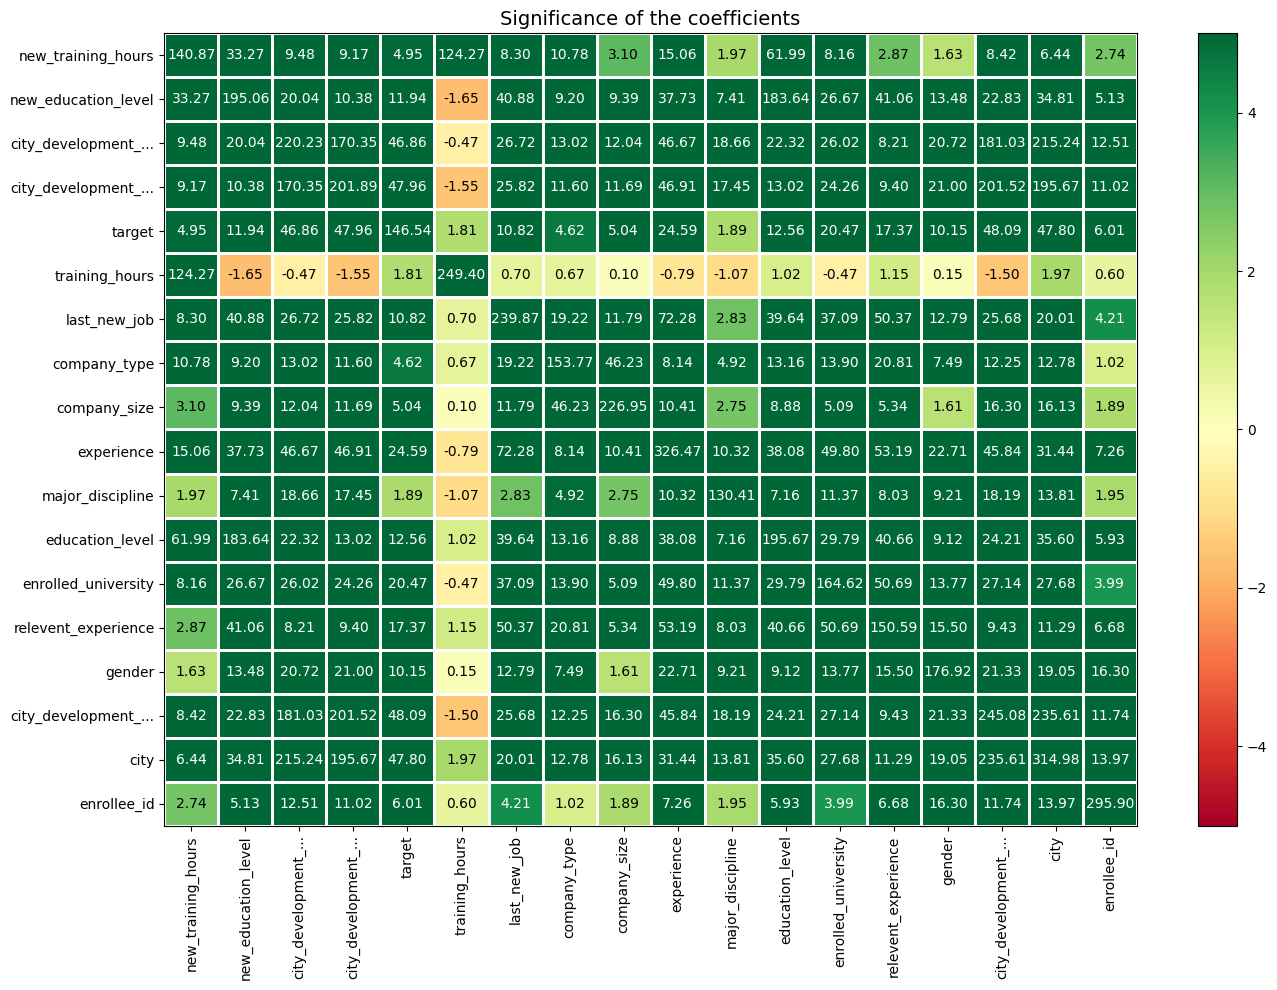

In [88]:
# Significance of the correlations
# When assessing correlations we should not only look at the coefficients 
# but also at their statistical significance. Because in the end, a large 
# correlation may be statistically insignificant, and vice versa.

significance_overview = df.significance_matrix(['enrollee_id', 'city_development_index', 'training_hours', 'target', 'new_training_hours'])
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1, figsize=(14, 10))
plt.tight_layout()


# The heatmap above presents the significance matrix. The color scale indicates the level
# of significance and it saturates at +/- 5 standard deviations. The relatively high values 
# of the correlation coefficient for the battle stats we mentioned above are statistically 
# significant, while the correlation of special attack versus generation is not.

# For more details on how to calculate the statistical significance and what corrections 
# to the “standard” p-value calculation are taken into account, please refer to the original paper.

C:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\phik\phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


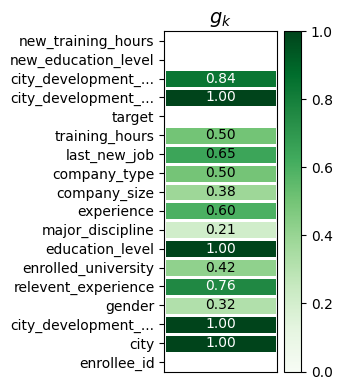

In [90]:
# Global correlation
# The global correlation coefficient is a useful measure expressing the 
# total correlation of one variable to all other variables in the dataset. 
# This gives us an indication of how well one variable can be modeled using the other variables.


global_correlation, global_labels = df.global_phik(['enrollee_id', 'city_development_index', 'training_hours', 'target', 'new_training_hours'])

plot_correlation_matrix(global_correlation, 
                        x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(3.5,4),
                        color_map="Greens", title=r"$g_k$",
                        fontsize_factor=1)
plt.tight_layout()

In [93]:
phik_overview['target'].sort_values(ascending = False)

target                            1.000000
city_development_index_group_q    0.523691
city_development_index            0.482287
city                              0.477283
city_development_index_group      0.302403
experience                        0.238725
relevent_experience               0.199859
new_education_level               0.132478
gender                            0.116653
last_new_job                      0.114708
enrolled_university               0.093803
education_level                   0.075999
company_size                      0.071953
enrollee_id                       0.067472
company_type                      0.066792
new_training_hours                0.054314
major_discipline                  0.029200
training_hours                    0.026849
Name: target, dtype: float64

In [ ]:
# Fhi k используется для общего представления.
Проверка. Есть ли связь. С помощью сводных таблиц.

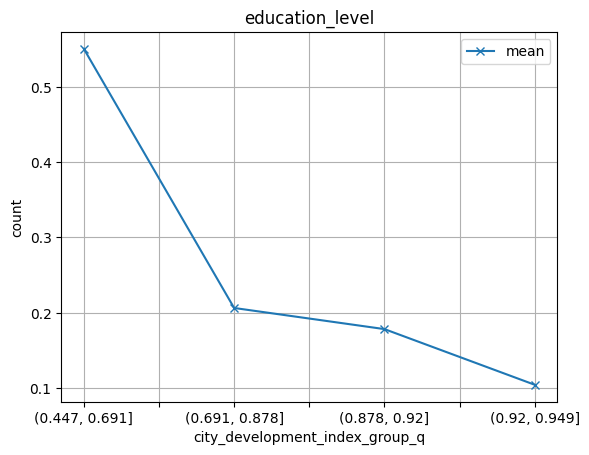

In [101]:
df.groupby('city_development_index_group_q', dropna = False)['target'].agg(['mean']).plot(marker = 'x')

plt.ylabel('count')
plt.title('education_level')
plt.grid()

# отражает связь между city_development_index_group_q и target.
# здесь: чем больше развитость города, тем меньше желание сменить работу (target стремится к нулю)

In [103]:
# Построим сводник по параметру city

In [113]:
df.groupby('city', dropna = False)['target'].agg(['mean', 'count'])

,mean,count
city,,
city_1,0.115385,26
city_10,0.104651,86
city_100,0.236364,275
city_101,0.573333,75
city_102,0.171053,304
...,...,...
city_93,0.192308,26
city_94,0.384615,26
city_97,0.076923,104


In [115]:
t = df.groupby('city', dropna = False)['target'].agg(['mean', 'count'])

In [118]:
# выбираем топ 10 городов по количеству населения

t.sort_values('count', ascending = False).head(10)

,mean,count
city,,
city_103,0.213088,4355
city_21,0.591044,2702
city_16,0.116765,1533
city_114,0.099551,1336
city_160,0.235503,845
city_136,0.104096,586
city_67,0.132251,431
city_75,0.101639,305
city_102,0.171053,304


<Axes: xlabel='city'>

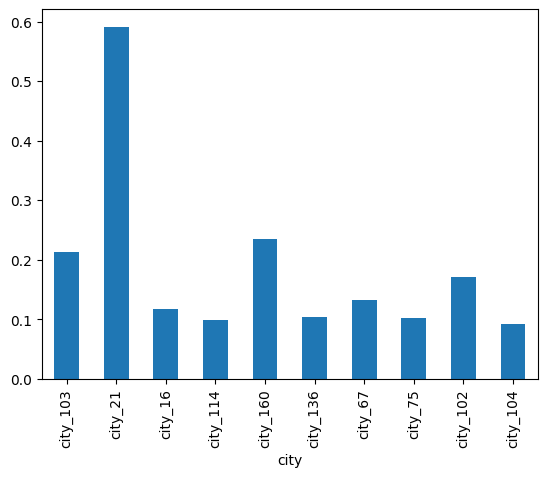

In [124]:
# выбираем топ 10 городов по количеству населения только по таргету и рисуем график

t.sort_values('count', ascending = False).head(10)['mean'].plot(kind = 'bar')

In [ ]:
# видим, что в городе 21 очень болшой процент желающх сменить работу = 0.591044
# узнаем почему так и добавим в сводник параметр city_development_index

In [127]:
t = df.groupby(['city', 'city_development_index'], dropna = False)['target'].agg(['mean', 'count'])

In [128]:
t

,,mean,count
city,city_development_index,,
city_1,0.847,0.115385,26
city_10,0.895,0.104651,86
city_100,0.887,0.236364,275
city_101,0.558,0.573333,75
city_102,0.804,0.171053,304
...,...,...,...
city_93,0.865,0.192308,26
city_94,0.698,0.384615,26
city_97,0.925,0.076923,104


In [131]:
# выше вариант кажется лучшь, но так сделано в видео: 

t = df.groupby('city', dropna = False)[['target', 'city_development_index']].agg(['mean', 'count'])



# кстати ниже окажется, что мой первоначальный вариант был лучше...

In [132]:
t

target       city_development_index      
              mean count                   mean count
city                                                 
city_1    0.115385    26                  0.847    26
city_10   0.104651    86                  0.895    86
city_100  0.236364   275                  0.887   275
city_101  0.573333    75                  0.558    75
city_102  0.171053   304                  0.804   304
...            ...   ...                    ...   ...
city_93   0.192308    26                  0.865    26
city_94   0.384615    26                  0.698    26
city_97   0.076923   104                  0.925   104
city_98   0.101266    79                  0.949    79
city_99   0.159574    94                  0.915    94

[123 rows x 4 columns]

In [133]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [141]:
t

,target_mean,target_count,city_development_index_mean,city_development_index_count
city,,,,
city_1,0.115385,26,0.847,26
city_10,0.104651,86,0.895,86
city_100,0.236364,275,0.887,275
city_101,0.573333,75,0.558,75
city_102,0.171053,304,0.804,304
...,...,...,...,...
city_93,0.192308,26,0.865,26
city_94,0.384615,26,0.698,26
city_97,0.076923,104,0.925,104


In [143]:
# выбираем топ 10 городов по количеству населения уже имея в df (точнее в t) параметр city_development_index

t.sort_values(['target_count','city_development_index_mean'], ascending = False).head(10)

,target_mean,target_count,city_development_index_mean,city_development_index_count
city,,,,
city_103,0.213088,4355,0.920,4355
city_21,0.591044,2702,0.624,2702
city_16,0.116765,1533,0.910,1533
city_114,0.099551,1336,0.926,1336
city_160,0.235503,845,0.920,845
city_136,0.104096,586,0.897,586
city_67,0.132251,431,0.855,431
city_75,0.101639,305,0.939,305
city_102,0.171053,304,0.804,304


In [144]:
# вот здесь вернемся к моему первоначальному варианту. Он во-первых исключает дублирвоание столбцов, во-вторых как-то короче

t = df.groupby(['city', 'city_development_index'], dropna = False)['target'].agg(['mean', 'count'])

In [153]:
t.sort_values('count', ascending = False)['mean'].head(10).reset_index()

,city,city_development_index,mean
0,city_103,0.920,0.213088
1,city_21,0.624,0.591044
2,city_16,0.910,0.116765
3,city_114,0.926,0.099551
4,city_160,0.920,0.235503
5,city_136,0.897,0.104096
6,city_67,0.855,0.132251
7,city_75,0.939,0.101639
8,city_102,0.804,0.171053
9,city_104,0.924,0.093023


<Axes: >

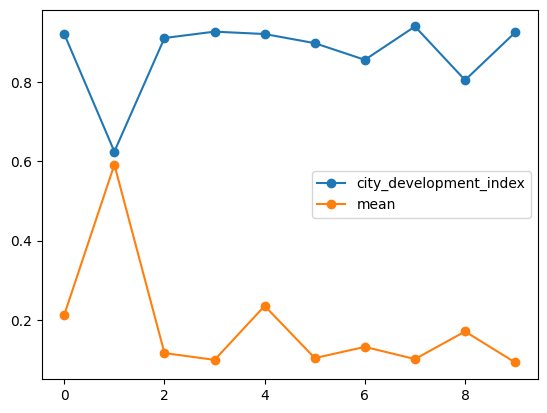

In [155]:
t.sort_values('count', ascending = False)['mean'].head(10).reset_index().plot(marker = 'o')

In [ ]:
# здесь очень хорошо видно, что в точке, где снижается city_development_index там и увеличивается 
# средний показатель таргета (то есть средняя доля людей, желающих сменить работу)

# Еще одна связь

In [ ]:
# параметр experience

In [160]:
df.groupby('experience', dropna = False)['target'].agg(['mean', 'count'])

,mean,count
experience,,
1,0.424408,549
10,0.210152,985
11,0.227410,664
12,0.186235,494
13,0.192982,399
14,0.182594,586
15,0.166181,686
16,0.141732,508
17,0.166667,342


In [163]:
# Здесь возникает сложность с <1 и >20

# Заменим эти параметры на 0 и 999 соответственно:

df['experience'].replace('<1', '0').replace('>20', '999')

0        999
1         15
2          5
3          0
4        999
        ... 
19153     14
19154     14
19155    999
19156      0
19157      2
Name: experience, Length: 19158, dtype: object

In [167]:
# и теперь переведем весь столбец experience в число:
# df['experience'].replace('<1', '0').replace('>20', '999').astype('int64') 
# здесь возникает ошибка cannot convert float NaN to integer
# значит нужно чем то заполнить nan - .fillna(-1)

df['experience'].replace('<1', '0').replace('>20', '999').fillna(-1).astype('int64')

0        999
1         15
2          5
3          0
4        999
        ... 
19153     14
19154     14
19155    999
19156      0
19157      2
Name: experience, Length: 19158, dtype: int64

In [168]:
# зададим новый столбец в df, вдруг исходный тоже пригодится:

df['new_experience'] = df['experience'].replace('<1', '0').replace('>20', '999').fillna(-1).astype('int64')

In [172]:
# разобъем новый столбец на категории:

pd.qcut(df['new_experience'],5)

0        (18.0, 999.0]
1         (11.0, 18.0]
2           (4.0, 6.0]
3        (-1.001, 4.0]
4        (18.0, 999.0]
             ...      
19153     (11.0, 18.0]
19154     (11.0, 18.0]
19155    (18.0, 999.0]
19156    (-1.001, 4.0]
19157    (-1.001, 4.0]
Name: new_experience, Length: 19158, dtype: category
Categories (5, interval[float64, right]): [(-1.001, 4.0] < (4.0, 6.0] < (6.0, 11.0] < (11.0, 18.0] < (18.0, 999.0]]

In [175]:
# теперь сгруппируем по этим категориям:
df.groupby(pd.qcut(df['new_experience'],5))['target'].agg(['mean', 'count'])

,mean,count
new_experience,,
"(-1.001, 4.0]",0.358964,5020
"(4.0, 6.0]",0.285336,2646
"(6.0, 11.0]",0.239740,4459
"(11.0, 18.0]",0.170561,3295
"(18.0, 999.0]",0.157571,3738


<Axes: xlabel='new_experience'>

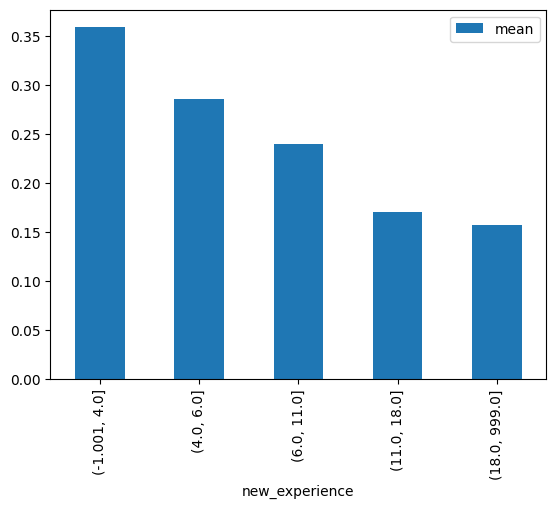

In [179]:
# построим график по этим данным

df.groupby(pd.qcut(df['new_experience'],5))['target'].agg(['mean']).plot(kind = 'bar')

# видно четкую зависимость - чем больше опыт, тем меньше показатель среднего таргета - то есть меньше желание сменить работу.